#**Sentiment Analysis-Amazon Reviews**

##**Business Problem**

The business problem in Amazon Alexa product sentiment analysis is to understand and analyze customer sentiment towards these devices. By analyzing customer feedback, businesses can enhance product features, improve customer satisfaction, conduct competitor analysis, shape marketing strategies, optimize customer support, and drive sales and revenue. Sentiment analysis provides valuable insights that guide decision-making and help businesses maintain a competitive edge in the market.

## **Project Description**

### Amazon is a global e-commerce platform where millions of products are reviewed. This project aims to analyze and model the sentiments expressed in Amazon customer reviews.

In this project, we will build a machine learning model for sentiment analysis specifically targeting Amazon Alexa products. The model will be trained on a dataset comprising customer reviews specific to Amazon Alexa devices. The goal is to accurately classify each review as positive or negative, thereby providing an assessment of customer sentiment towards the product.
By understanding the sentiment towards Amazon Alexa products, we aim to gain insights into customer satisfaction, identify areas for improvement, and support decision-making processes related to product development and marketing strategies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/amazon_alexa.tsv", delimiter ='\t', quoting = 3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# getting column names
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
# Checking for null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
data.dropna().head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Creating a new column 'length'that will contain the lenght of the string in 'verified_reviews' column
# Convert float values in 'verified_reviews' column to strings
data['verified_reviews'] = data['verified_reviews'].astype(str)

# Create a new column 'length' that contains the length of the string in 'verified_reviews' column
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

##**Exploratory Data Analysis (EDA)**

**Analyzing Rating column**

This column refers to the rating of the variation given by the user

In [ ]:
## Distinct values of rating and it's count
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

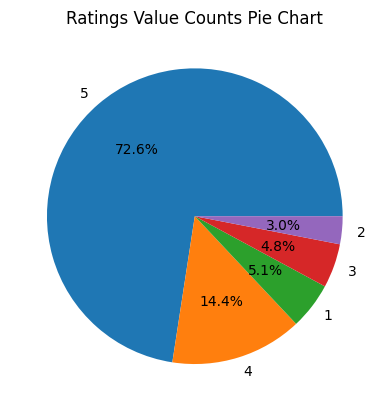

In [ ]:
rating_counts=data['rating'].value_counts()

# Plotting the pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Ratings Value Counts Pie Chart')
plt.show()

Analyzing the feedback column

In [ ]:
# Distinct values of feedback column
data['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [ ]:
# Extracting the verified_reviews value for one record with feedback = 0
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
# Extracting the verified_reviews value for one record with feedback = 1
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']
review_1

'Loved it!'

From the above analysis we can see that 0 is a negative review and 1 is a positive review

Lets plot the feedback value_count on a bar plot

Text(0, 0.5, 'Count')

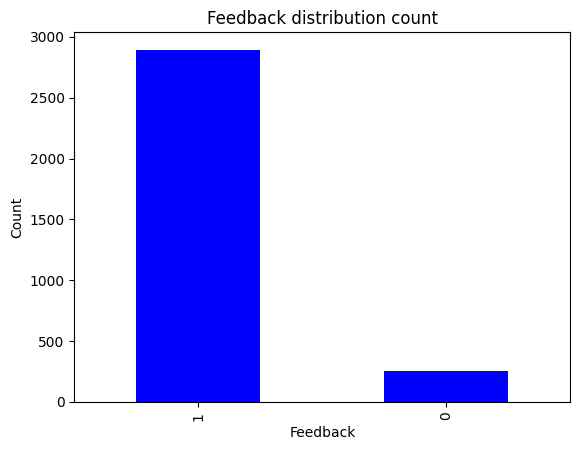

In [ ]:
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')

In [ ]:
#Feedback distribution in percentage
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.84
0     8.16
Name: count, dtype: float64


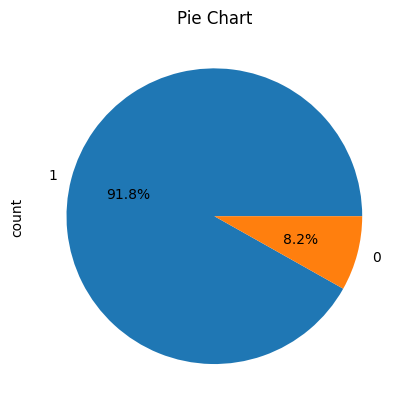

In [ ]:

data['feedback'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

In [ ]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     96
Name: count, dtype: int64

In [ ]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [ ]:
# Distinct values of variation counts
print(f"Variation value counts \n{data['variation'].value_counts()}" )

Variation value counts 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


Text(0, 0.5, 'Count')

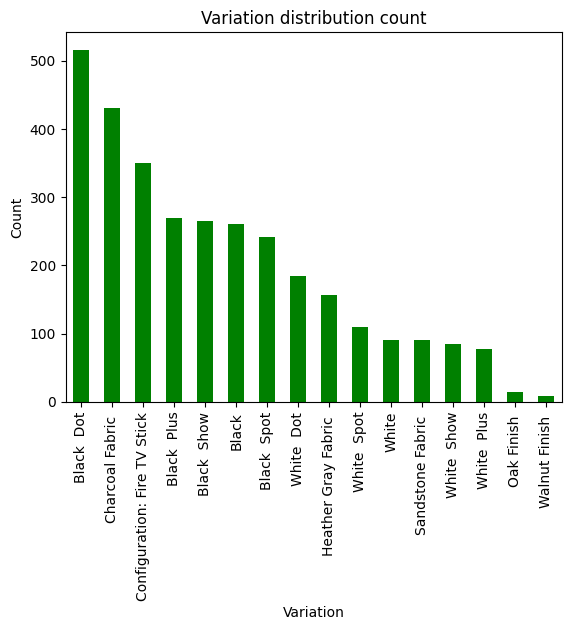

In [ ]:
data['variation'].value_counts().plot.bar(color='green')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')

In [ ]:
#Variation distribution in percentage
print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Text(0, 0.5, 'Mean Rating')

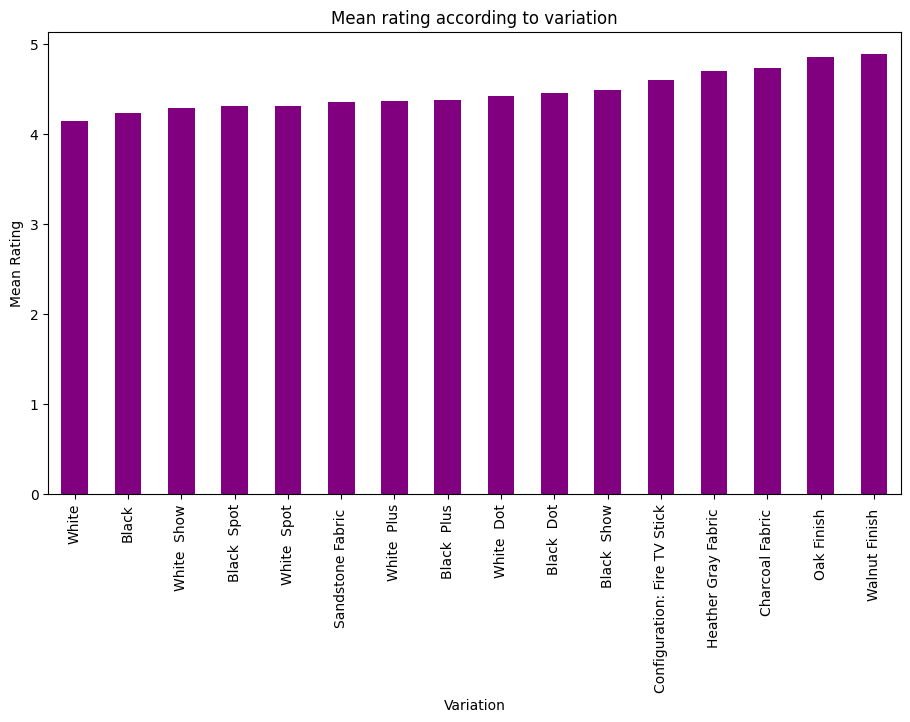

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='purple', figsize=(11,6))
plt.title('Mean rating according to variation')
plt.xlabel('Variation')
plt.ylabel('Mean Rating')

Analysing Verified reviews

In [ ]:
data['length'].describe()

count    3150.000000
mean      132.673333
std       182.527177
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

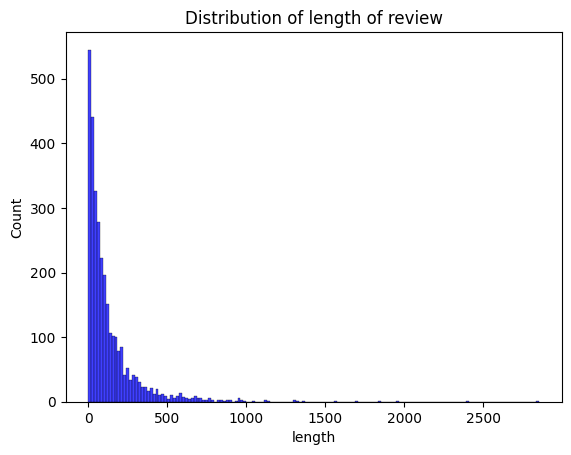

In [ ]:
sns.histplot(data['length'], color='blue').set(title='Distribution of length of review')

Length analysis when feedback is 0 (negative)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

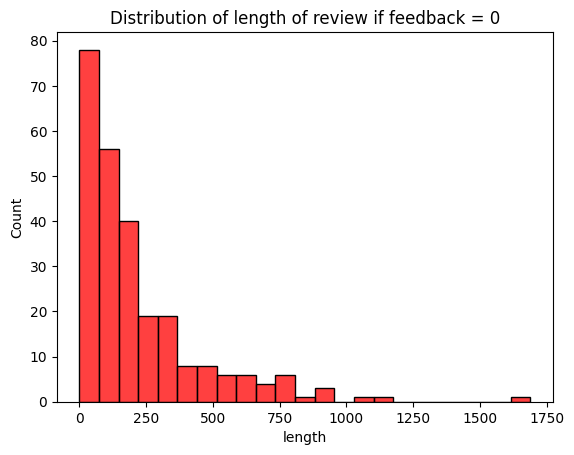

In [ ]:
sns.histplot(data[data['feedback']==0]['length'], color='red').set(title='Distribution of length of review if feedback = 0')

Length analysis when feedback is 1 (positive)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

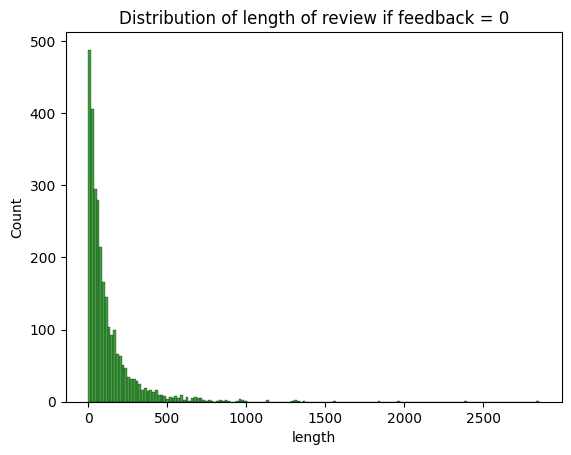

In [ ]:
sns.histplot(data[data['feedback']==1]['length'], color='green').set(title='Distribution of length of review if feedback = 0')

Text(0, 0.5, 'length')

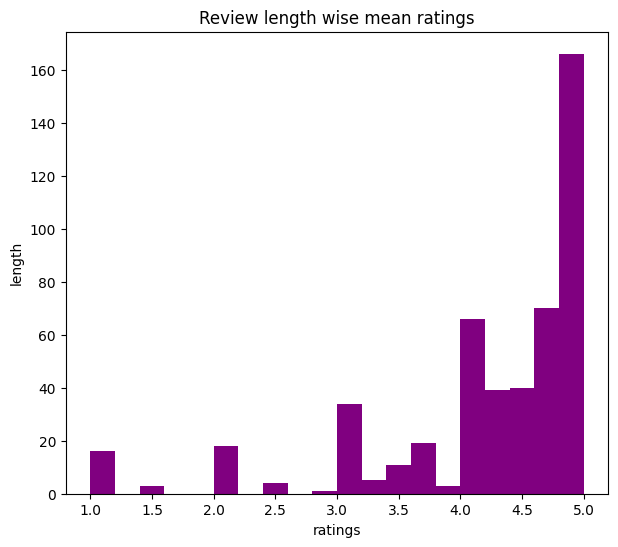

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color='purple', figsize=(7,6), bins = 20)
plt.title('Review length wise mean ratings')
plt.xlabel('ratings')
plt.ylabel('length')

##**Data Preprocessing**

In [ ]:
cv = CountVectorizer(stop_words= 'english')
words = cv.fit_transform(data.verified_reviews)

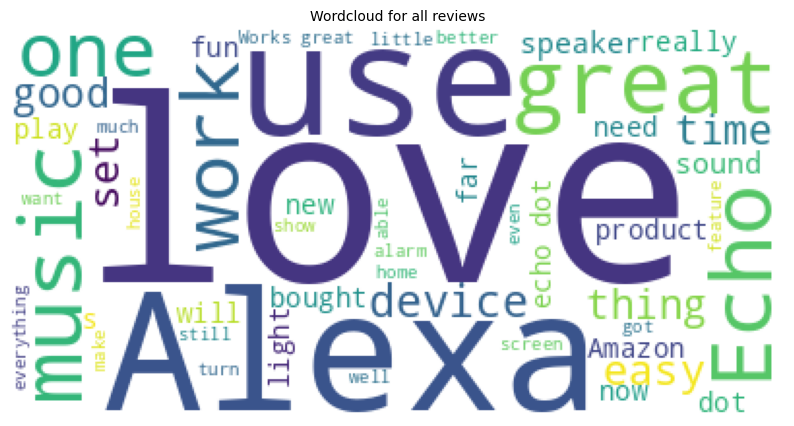

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize= 10)
plt.axis('off')
plt.show()

Lets find the unique words in each feedback category

In [ ]:
# Combine all reviews for each feedback category and splitting them into two individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

The code segment below initializes a WordCloud object, generates a word cloud based on negative reviews, and displays the resulting word cloud plot.

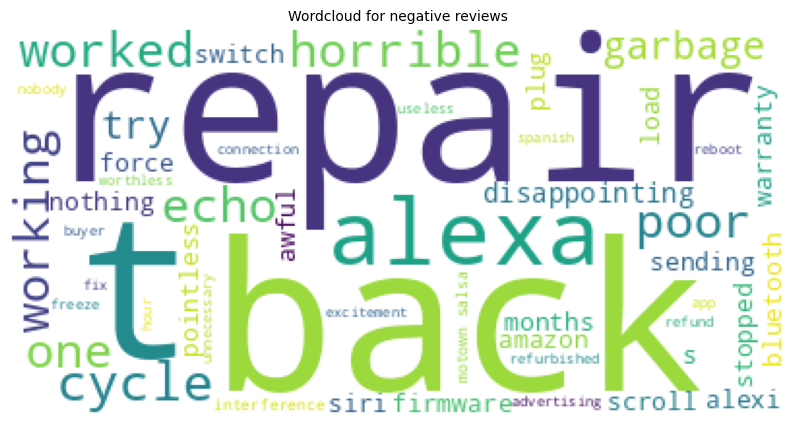

In [ ]:

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize= 10)
plt.axis('off')
plt.show()

Now generating a word cloud based on positive reviews, and displaying the resulting word cloud plot

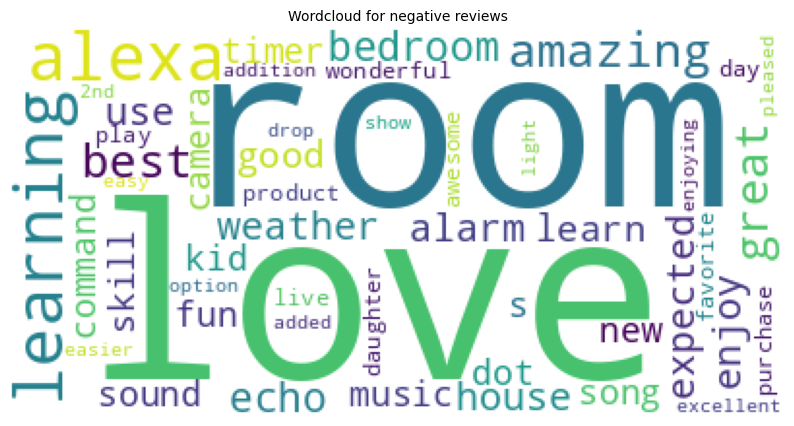

In [ ]:
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize= 10)
plt.axis('off')
plt.show()

###Text Preprocessing

The code segment below tokenizes the text reviews, removes non-alphabetic characters, converts the text to lowercase, applies stemming, removes stopwords, and stores the preprocessed reviews in a list called corpus. It is a common preprocessing pipeline used to clean and standardize text data before performing natural language processing tasks such as sentiment analysis or topic modeling.

To build the corpus from the verified_reviews we perform the following-



1.  Replace any non alphabet characters with a space
2.  Convert to lower case and split into words
3.  Iterate over the individual words and if it is not a stopword then add the
    stemmed form of the word to the corpus





In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range (0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In this section, the texts in the 'verified_reviews' column are transformed into numerical vectors using the CountVectorizer method. During this transformation process, the frequency of each word in the texts is calculated, and these frequencies are used to convert each text into a numerical vector. This step is critical for transforming text data into a suitable format for use in machine learning models. This numerical representation of texts facilitates the extraction of significant features and efficient processing of data during the modeling process.

In [ ]:
cv = CountVectorizer(max_features = 2500)

# Storing independebt and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
# Saving the Count Vectorizer
pickle.dump(cv, open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/CountVectorizer.pkl', 'wb'))

Checking the shape of X and y

In [ ]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (3150, 2500)
y shape: (3150,)


## **Model** **Building**

Splitting data into train and test set with 30% data with testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=15)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (2205, 2500)
y_train: (2205,)
X_test: (945, 2500)
y_test: (945,)


In [ ]:
print(f'X train max value: {X_train.max()}')
print(f'X test max value: {X_test.max()}')

X train max value: 12
X test max value: 10


We'll scale X_train and X_test so thall all values are between 0 and 1

 Now we will scale the features in the training and test datasets using the MinMaxScaler. It ensures that the features have a consistent range, which can be beneficial for certain machine learning algorithms that are sensitive to the scale of the input features.

In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# Saving the scaler model
pickle.dump(scaler, open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/Scaler.pkl', 'wb'))

**Random** **Forest** **Classifier**

In [ ]:
# Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy :', model_rf.score(X_train_scl, y_train))
print('Testing Accuracy :', model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386


In [ ]:
# Predicting on the test set
y_preds = model_rf.predict(X_test_scl)


In [ ]:
cm = confusion_matrix(y_test, y_preds)

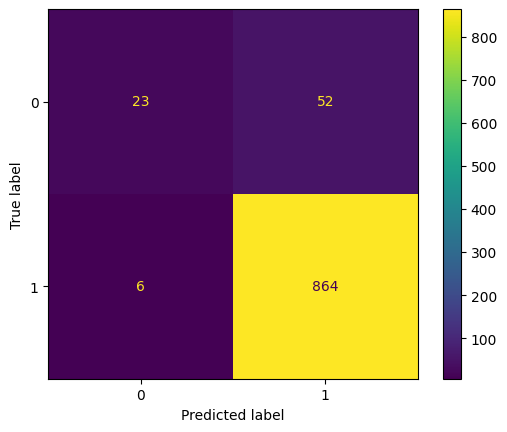

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
# Saving the model r_f
pickle.dump(model_rf, open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/Model_rf.pkl', 'wb'))

**XgBoost**

In [ ]:
# Fitting scaled X_train and y_train on Random Forest Classifier
model_xg = XGBClassifier()
model_xg.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy :', model_xg.score(X_train_scl, y_train))
print('Testing Accuracy :', model_xg.score(X_test_scl, y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


In [ ]:
# Predicting on the test set
y_preds = model_xg.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_preds)

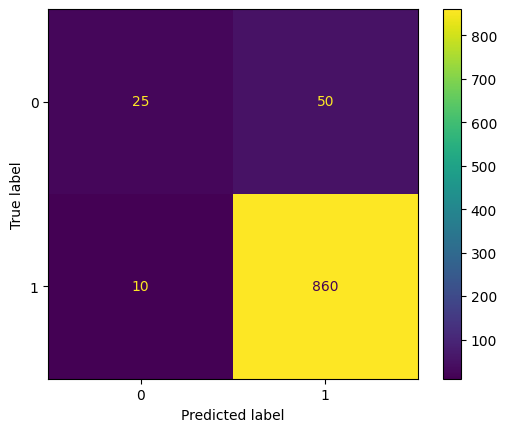

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xg.classes_)
cm_display.plot()
plt.show()

In [ ]:
# Saving the model r_f
pickle.dump(model_xg, open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/Model_xg.pkl', 'wb'))

**Decision** **Tree** **Classifier**

In [ ]:
# Fitting scaled X_train and y_train on Random Forest Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy of the model on training and testing data

print('Training Accuracy :', model_dt.score(X_train_scl, y_train))
print('Testing Accuracy :', model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9132275132275133


In [ ]:
# Predicting on the test set
y_preds = model_dt.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_preds)

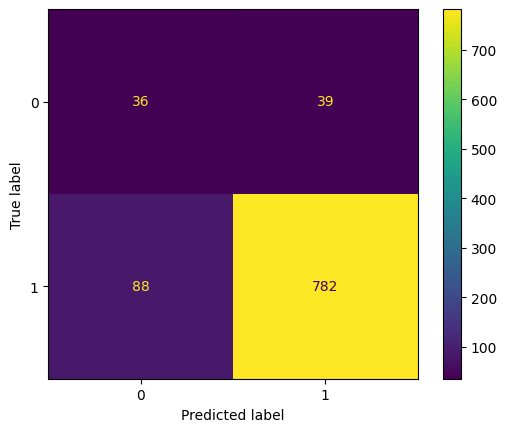

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [ ]:
# Saving the model r_f
pickle.dump(model_dt, open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis Project on Amazon Reviews/Model_dt.pkl', 'wb'))

This analysis compared the performance of three machine learning algorithms for classification tasks: Decision Tree Classifier, XGBoost and Random Forest Classifier. Accuracy score was used as the primary metric for evaluation.


**Random Forest:** Random Forest ensembles multiple decision trees, improving accuracy and reducing overfitting compared to a single decision tree. It often achieves high accuracy scores without extensive parameter tuning. In this analysis, the Random Forest Classifier achieved an accuracy score of Training Accuracy : 99% and Testing Accuracy : 94% , outperforming both the decision tree and xgboost.



**XGBoost:** XGBoost is a powerful gradient boosting algorithm known for its ability to handle complex data and achieve high accuracy. It requires more hyperparameter tuning compared to Random Forest but can potentially outperform it on specific datasets. In this comparison, XGBoost achieved an accuracy score of Training Accuracy : 97% and Testing Accuracy : 94% .



**Decision Tree:** Decision trees offer a simple and interpretable approach to classification. However, they can be prone to overfitting, especially on complex datasets. In this comparison, the decision tree achieved an accuracy score of Training Accuracy : 99% and Testing Accuracy : 91% .

Conclusion:

Overall, random forest classifier achieved the highest accuracy score in this comparison. However, the choice between these algorithms depends on factors such as dataset complexity, interpretability requirements, and computational resources. Random Forest offers a good balance between accuracy and ease of use, while decision trees are suitable for simpler problems where interpretability is crucial.